## 1) Delivery_time -> Predict delivery time using sorting time 
## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1. Importing necessary libraries

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

from pickle import dump,load

import warnings
warnings.filterwarnings('ignore')

# 2. Data Collection

In [33]:
sorting_time_data=pd.read_csv(r"D:\Data Science\DS Assignments\Simple_linear_regression\delivery_time.csv")
sorting_time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 3. Data Understanding

## 3.1 Initial Analysis

In [3]:
sorting_time_data.shape

(21, 2)

In [4]:
sorting_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
sorting_time_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
sorting_time_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## 3.2 Assumption Check

### 3.2.1 Linearity Test

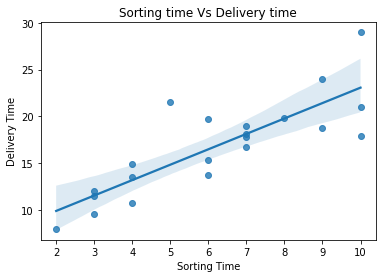

In [7]:
sns.regplot(x=sorting_time_data['Sorting Time'],y=sorting_time_data['Delivery Time'],
            data=sorting_time_data)
plt.title('Sorting time Vs Delivery time')
plt.show()

### Linearity test fails since the data does not lie in the linearly fitted line

### 3.2.2 Normality Test

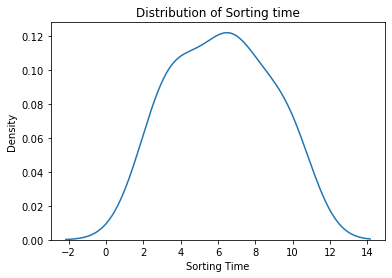

In [8]:
sns.kdeplot(x='Sorting Time',data=sorting_time_data)
plt.title('Distribution of Sorting time')
plt.show()

### Normality test fails

# 4. Data Preparation

In [9]:
new_df=sorting_time_data[['Delivery Time']]
new_df['Sorting_time']=sorting_time_data['Sorting Time']
new_df.columns=['Delivery_time','Sorting_time']
new_df

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# 4. Model Building 

In [35]:
X=sorting_time_data[['Sorting Time']]
y=sorting_time_data[['Delivery Time']]

# 5. Model Training

In [36]:
linear_model=LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [38]:
linear_model.coef_

array([[1.6490199]])

In [39]:
linear_model.intercept_

array([6.58273397])

# 6. Model Testing

In [40]:
linear_model.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [41]:
y_pred=pd.DataFrame({'Sorting_Time':sorting_time_data['Sorting Time'],
                     'Delivery_Time_actual':sorting_time_data['Delivery Time']}) 

y_pred['Delivery_Time_pred'] = linear_model.predict(X)
y_pred

,Sorting_Time,Delivery_Time_actual,Delivery_Time_pred
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# 7. Model Evaluation

In [42]:
y_pred['Error']=y_pred['Delivery_Time_actual']-y_pred['Delivery_Time_pred']
y_pred

,Sorting_Time,Delivery_Time_actual,Delivery_Time_pred,Error
0,10,21.00,23.072933,-2.072933
1,4,13.50,13.178814,0.321186
2,6,19.75,16.476853,3.273147
3,9,24.00,21.423913,2.576087
4,10,29.00,23.072933,5.927067
5,6,15.35,16.476853,-1.126853
6,7,19.00,18.125873,0.874127
7,3,9.50,11.529794,-2.029794
8,10,17.90,23.072933,-5.172933
9,9,18.75,21.423913,-2.673913


# Data Transformation

In [46]:
log_transformed=sorting_time_data.transform(np.log)
log_transformed.head()

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


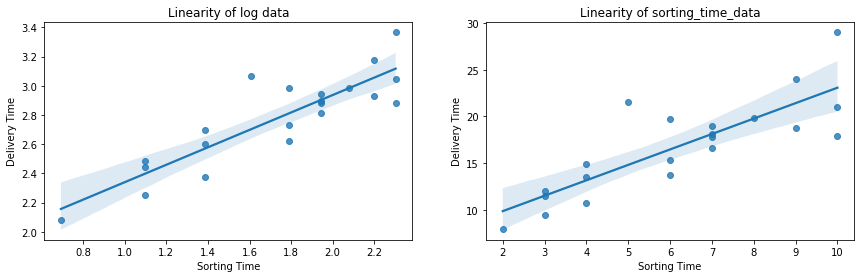

In [48]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.regplot(x='Sorting Time', y='Delivery Time', data=log_transformed, ax=axes[0])
axes[0].set_title('Linearity of log data')

sns.regplot(x=sorting_time_data['Sorting Time'],y=sorting_time_data['Delivery Time'],
            data=sorting_time_data, ax=axes[1])
axes[1].set_title('Linearity of sorting_time_data')

plt.show()

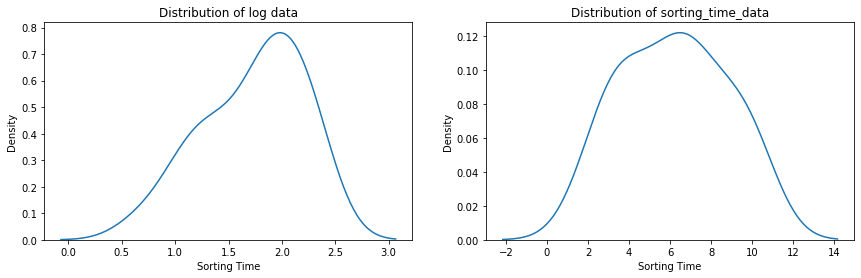

In [52]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.kdeplot(x='Sorting Time', data=log_transformed, ax=axes[0])
axes[0].set_title('Distribution of log data')

sns.kdeplot(x='Sorting Time',data=sorting_time_data, ax=axes[1])
axes[1].set_title('Distribution of sorting_time_data')

plt.show()

In [53]:
cbrt_transformed=sorting_time_data.transform(np.cbrt)
cbrt_transformed.head()

,Delivery Time,Sorting Time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435


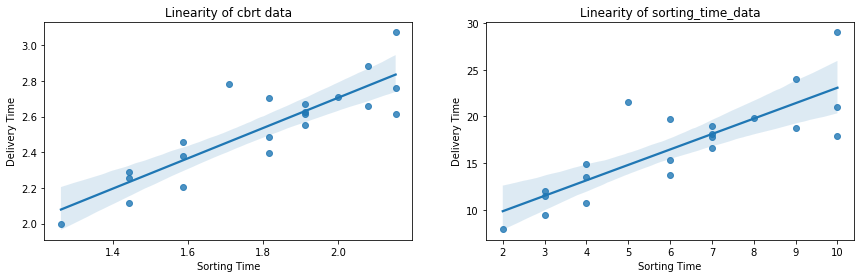

In [59]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.regplot(x='Sorting Time', y='Delivery Time', data=cbrt_transformed, ax=axes[0])
axes[0].set_title('Linearity of cbrt data')

sns.regplot(x=sorting_time_data['Sorting Time'],y=sorting_time_data['Delivery Time'],
            data=sorting_time_data, ax=axes[1])

#sns.regplot(x='Sorting Time', y='Delivery Time', data=log_transformed, ax=axes[1])
#axes[1].set_title('Linearity of log data')

axes[1].set_title('Linearity of sorting_time_data')

plt.show()

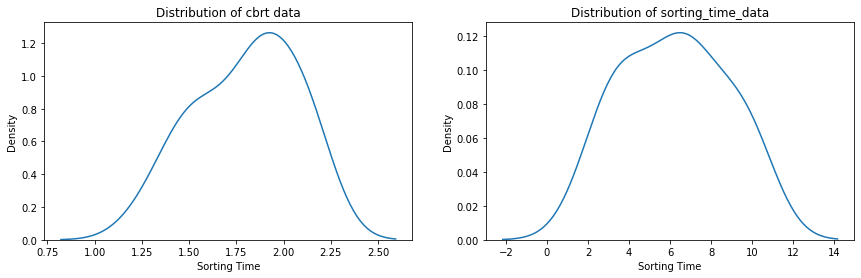

In [58]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=2)

sns.kdeplot(x='Sorting Time', data=cbrt_transformed, ax=axes[0])
axes[0].set_title('Distribution of cbrt data')

sns.kdeplot(x='Sorting Time',data=sorting_time_data, ax=axes[1])
axes[1].set_title('Distribution of sorting_time_data')

#sns.kdeplot(x='Sorting Time', data=log_transformed, ax=axes[1])
#axes[1].set_title('Distribution of log data')

plt.show()

## Linearity and Normality are same even after data transformation hence choosing previously built linear model

# 9. Model Deployment

In [60]:
dump(linear_model,open('delivery_time_intelligence.pkl','wb'))

In [61]:
linear_model_loaded=load(open('delivery_time_intelligence.pkl','rb'))

In [62]:
inp=pd.DataFrame({'Experience':[2,3,4]})
inp

,Experience
0,2
1,3
2,4


In [63]:
inp['Delivery Time Estimated']=linear_model_loaded.predict(inp)
inp

,Experience,Delivery Time Estimated
0,2,9.880774
1,3,11.529794
2,4,13.178814
